In [1]:
!pip install nltk
!pip install gensim
!pip install wordcloud
d: https://pip.pypa.io/warnings/venv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
import re
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from sklearn.metrics import classification_report, confusion_matrix

In [8]:
!pip install nltk
!pip install gensim
!pip install wordcloud

In [5]:
df = pd.read_csv("C:\\Users\\hp\\Downloads\\Resume.csv")
df.head()

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


In [6]:
df.drop(columns = ['ID', 'Resume_html'], inplace = True)
df

,Resume_str,Category
0,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,HR
1,"HR SPECIALIST, US HR OPERATIONS ...",HR
2,HR DIRECTOR Summary Over 2...,HR
3,HR SPECIALIST Summary Dedica...,HR
4,HR MANAGER Skill Highlights ...,HR
...,...,...
2479,RANK: SGT/E-5 NON- COMMISSIONED OFFIC...,AVIATION
2480,"GOVERNMENT RELATIONS, COMMUNICATIONS ...",AVIATION
2481,GEEK SQUAD AGENT Professional...,AVIATION
2482,PROGRAM DIRECTOR / OFFICE MANAGER ...,AVIATION


In [11]:
import nltk
STEMMER = nltk.stem.porter.PorterStemmer()

In [12]:
def preprocess(txt):
    # convert all characters in the string to lower case
    txt = txt.lower()
    # remove non-english characters, punctuation and numbers
    txt = re.sub('[^a-zA-Z]', ' ', txt)
    # tokenize word
    txt = nltk.tokenize.word_tokenize(txt)
    # remove stop words
    txt = [w for w in txt if not w in nltk.corpus.stopwords.words('english')]
    # stemming
    txt = [STEMMER.stem(w) for w in txt]

    return ' '.join(txt)

In [14]:
import re 
df['Resume'] = df['Resume_str'].apply(lambda w: preprocess(w))
# drop original text column
df.pop('Resume_str')
df

,Category,Resume
0,HR,hr administr market associ hr administr summar...
1,HR,hr specialist us hr oper summari versatil medi...
2,HR,hr director summari year experi recruit plu ye...
3,HR,hr specialist summari dedic driven dynam year ...
4,HR,hr manag skill highlight hr skill hr depart st...
...,...,...
2479,AVIATION,rank sgt e non commiss offic charg brigad mail...
2480,AVIATION,govern relat commun organiz develop director p...
2481,AVIATION,geek squad agent profession profil support spe...
2482,AVIATION,program director offic manag summari highli pe...


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  2484 non-null   object
 1   Resume    2484 non-null   object
dtypes: object(2)
memory usage: 38.9+ KB


In [16]:
df['Category'].value_counts()

BUSINESS-DEVELOPMENT      120
INFORMATION-TECHNOLOGY    120
ADVOCATE                  118
FINANCE                   118
CHEF                      118
ENGINEERING               118
ACCOUNTANT                118
FITNESS                   117
AVIATION                  117
SALES                     116
HEALTHCARE                115
CONSULTANT                115
BANKING                   115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: Category, dtype: int64

NameError: name 'plt' is not defined

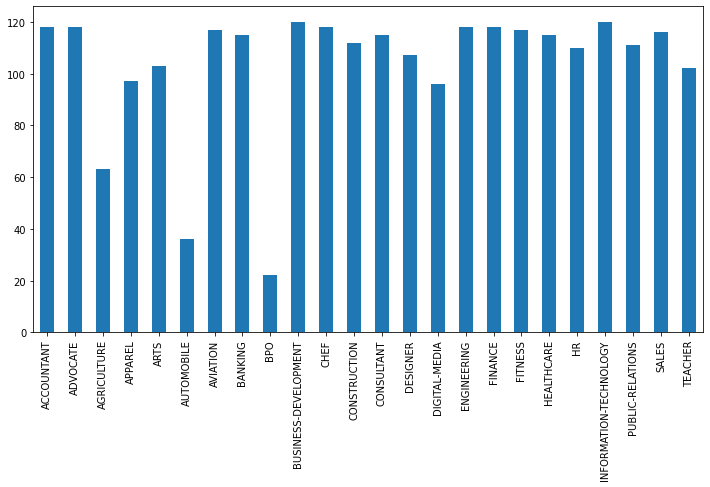

In [17]:
df['Category'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6))
plt.show()

In [ ]:
plt.figure(1, figsize=(25,25))
grid=GridSpec(2,2)

cmap=plt.get_cmap('coolwarm')

color=[cmap(i) for i in np.linspace(0, 1, 5)]
plt.subplot(grid[0,1], aspect=1, title='Distribution')

pie=plt.pie(count, labels=label, autopct='%1.2f%%')
plt.show()

In [ ]:
# create list of all categories
categories = np.sort(df['Category'].unique())
categories

In [ ]:
# create new df for corpus and category
df_categories = [df[df['Category'] == category].loc[:, ['Resume', 'Category']] for category in categories]
df_categories[10]

In [ ]:
# word frequency for each category
def wordfreq(df):
    count = df['Resume'].str.split(expand=True).stack().value_counts().reset_index()
    count.columns = ['Word', 'Frequency']

    return count.head(10)

In [ ]:
fig = plt.figure(figsize=(32, 64))

for i, category in enumerate(np.sort(df['Category'].unique())):
    wf = wordfreq(df_categories[i])

    fig.add_subplot(12, 2, i + 1).set_title(category)
    plt.bar(wf['Word'], wf['Frequency'])
    plt.ylim(0, 3500)

plt.show()
plt.close()

In [ ]:
nltk.download("punkt")
nltk.download("stopwords")

In [ ]:
from nltk.corpus import stopwords

In [ ]:
def remove_stop_words (text):
  result = []
  for token in gensim.utils.simple_preprocess(text):
    if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3 and token not in stop_words:
      result.append(token)

  return result

In [ ]:
df['clean'] = df['Resume'].apply(remove_stop_words).astype(str)

In [ ]:
df['clean'][0]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df['clean'], df['Category'], test_size = 0.2)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# vectorize text data
vectorizer = CountVectorizer()
conuntvectorizer_train = vectorizer.fit_transform(X_train).astype(float)
conuntvectorizer_test = vectorizer.transform(X_test).astype(float)

In [ ]:
# using grid search for find optimal values for RF classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

RFC = RandomForestClassifier(random_state=42)

param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

grid = GridSearchCV(estimator=RFC, param_grid=param_grid, cv= 5, scoring='accuracy', return_train_score=False, verbose=1)
grid_search = grid.fit(conuntvectorizer_train, Y_train)

print(grid_search.best_params_)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF_Model = RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 500, max_depth=8, criterion='gini')
RF_Model.fit(conuntvectorizer_train, Y_train)

In [ ]:
prediction=RF_Model.predict(conuntvectorizer_test)
prediction
